<a href="https://colab.research.google.com/github/karans17s/Practical_Implementation_Of_Deep_learning/blob/main/PHASE_2_BASIC_ANN_IMPLEMENTING_USING_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step:1 == First Import Libs..**

### 1) torch lib use :

### -- this lib for tensors and computations

### -- .nn for the neural network , we know that torch special for the DL

### -- .optim means we know that SGD , adam these are optimal algo for process

### 2) about tensor :

### -- numpy with Supportive GPU

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from torchsummary import summary
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd

# Step : 2 == Connect with GPU

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step : 3 == load CSV data

## why use .tensor(data & labels)

### torch module direct not process with numpy arrays , req GPU system for the operation so....

In [ ]:
def load_csv_dataset(csv_path):
    df = pd.read_csv(csv_path)
    data = df.iloc[:, 1:].values.astype('float32')  # Skip the label column
    labels = df.iloc[:, 0].values.astype('int64')  # First column is the label
    data = data / 255.0  # Normalize pixel values to [0, 1]
    data = torch.tensor(data)
    labels = torch.tensor(labels)
    return TensorDataset(data, labels)


In [ ]:
data_frame_train = load_csv_dataset('/content/mnist_train.csv')

In [ ]:
data_frame_train

In [ ]:
data_shape_train = data_frame_train.tensors[0].shape

In [ ]:
data_shape_train

torch.Size([60000, 784])

In [ ]:
data_frame_test = load_csv_dataset('/content/mnist_test.csv')

In [ ]:
data_frame_test

In [ ]:
data_shape_test = data_frame_test.tensors[0].shape

In [ ]:
data_shape_test

torch.Size([10000, 784])

In [ ]:
def print_tensor_dataset_head(dataset, num_rows=5):
    data_tensor, label_tensor = dataset.tensors
    data_df = pd.DataFrame(data_tensor.numpy())
    data_df['label'] = label_tensor.numpy()
    print(data_df.head(num_rows))

In [ ]:
print_tensor_dataset_head(data_frame_train)

     0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  label  
0  0.0  0.0  0.0  0.0  0.0      5  
1  0.0  0.0  0.0  0.0  0.0      0  
2  0.0  0.0  0.0  0.0  0.0      4  
3  0.0  0.0  0.0  0.0  0.0      1  
4  0.0  0.0  0.0  0.0  0.0      9  

[5 rows x 785 columns]


In [ ]:
print_tensor_dataset_head(data_frame_test)

     0    1    2    3    4    5    6    7    8    9  ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  label  
0  0.0  0.0  0.0  0.0  0.0      7  
1  0.0  0.0  0.0  0.0  0.0      2  
2  0.0  0.0  0.0  0.0  0.0      1  
3  0.0  0.0  0.0  0.0  0.0      0  
4  0.0  0.0  0.0  0.0  0.0      4  

[5 rows x 785 columns]


# Step : 4 == Show the handwritten digits imgs

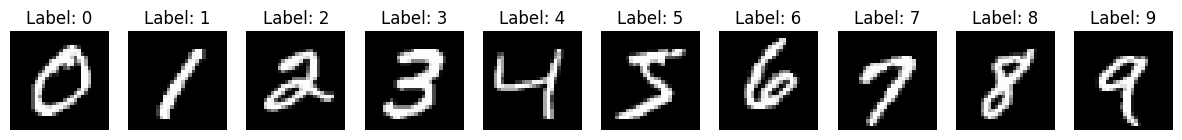

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
found_digits = {}
for img, label in data_frame_train:
    digit = label.item()
    if digit not in found_digits:
        found_digits[digit] = img.reshape(28, 28).numpy()
        axes[digit].imshow(found_digits[digit], cmap='gray')
        axes[digit].set_title(f"Label: {digit}")
        axes[digit].axis('off')
    if len(found_digits) == 10:
        break
plt.show()

# Step : 5 == Hyperparameter Tuning

In [ ]:
batch_size = 64
lr = 0.001
epochs = 50

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train_loader = DataLoader(
    data_frame_train,
    batch_size=batch_size,
    shuffle=True
    )
test_loader = DataLoader(
    data_frame_test,
    batch_size=batch_size,
    shuffle=False
    )

# Step : 6 == Define the nn model

### fc1 -- first fully connected layer and fcn so on.....

### 6-fully connected layer

### nn.Linear is a fully connected layer/dense layer) linear transformation.

### output == XW(T) + b

### nn.Linear(in_features, out_features)


In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 32)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(32, 16)
        self.relu5 = nn.ReLU()
        self.fc6 = nn.Linear(16, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # -1 for reshaping methods like view() , reshape() -- batch size
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        x = self.relu5(x)
        x = self.fc6(x)
        return x

In [ ]:
model = ANN().to(device)
print("Detailed Model Summary:")
summary(model, input_size=(1, 28, 28)) # 1 means -- grayscale img....

Detailed Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
              ReLU-2                  [-1, 256]               0
            Linear-3                  [-1, 128]          32,896
              ReLU-4                  [-1, 128]               0
            Linear-5                   [-1, 64]           8,256
              ReLU-6                   [-1, 64]               0
            Linear-7                   [-1, 32]           2,080
              ReLU-8                   [-1, 32]               0
            Linear-9                   [-1, 16]             528
             ReLU-10                   [-1, 16]               0
           Linear-11                   [-1, 10]             170
Total params: 244,890
Trainable params: 244,890
Non-trainable params: 0
----------------------------------------------------------------
Input 

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad) # p.requires_grad -- total number of trainable parameters in given model

print(f"Total trainable parameters: {count_parameters(model)}")

Total trainable parameters: 244890


# Step : 7 == Calculate accuracy and losses.......

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
train_losses = []
train_accuracies = []
epochs = 10

In [ ]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad() # clears the previous gradients
        loss.backward()  # computes the gradients for the current batch
        optimizer.step() # and update......

        running_loss += loss.item() # also loss update
        _, predicted = torch.max(outputs, 1) # predicted class with the highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%')

Epoch [1/10], Loss: 0.4731, Accuracy: 84.76%
Epoch [2/10], Loss: 0.1536, Accuracy: 95.55%
Epoch [3/10], Loss: 0.1096, Accuracy: 96.80%
Epoch [4/10], Loss: 0.0808, Accuracy: 97.62%
Epoch [5/10], Loss: 0.0642, Accuracy: 98.04%
Epoch [6/10], Loss: 0.0539, Accuracy: 98.39%
Epoch [7/10], Loss: 0.0425, Accuracy: 98.70%
Epoch [8/10], Loss: 0.0357, Accuracy: 98.91%
Epoch [9/10], Loss: 0.0335, Accuracy: 98.97%
Epoch [10/10], Loss: 0.0278, Accuracy: 99.14%


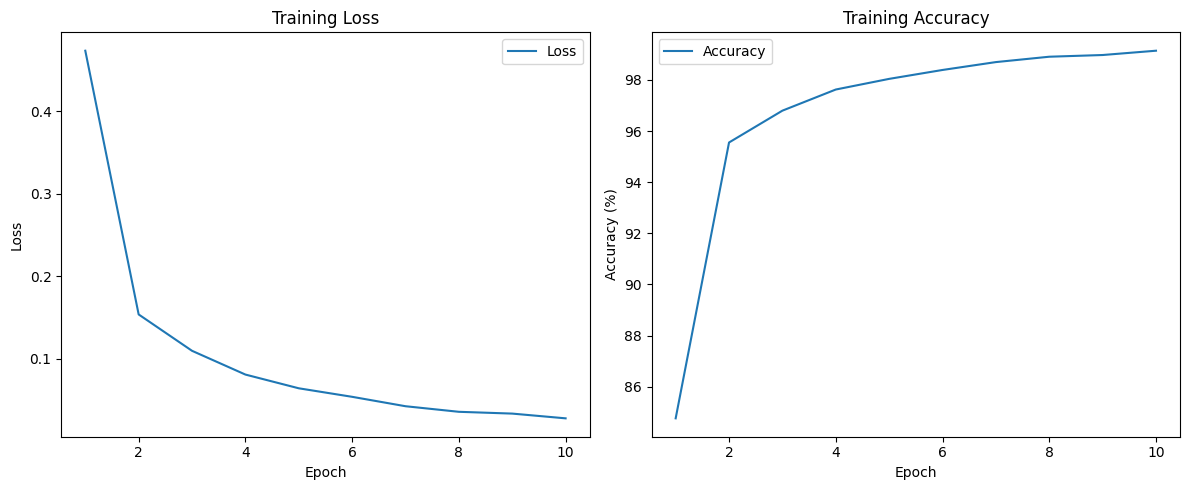

In [ ]:
plt.figure(figsize=(12, 5))
# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step : 8 == Model evaluating.....

In [ ]:
print("Evaluating the model>>>>>>>>>>>>>>")
model.eval()

# Initialize lists
all_preds = []
all_labels = []
all_images = []

with torch.no_grad():
    for images, labels in test_loader:
        # Move images and labels to the appropriate device GPU------
        images, labels = images.to(device), labels.to(device)

        # Get model predictions
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Collect predictions, labels, and images
        all_preds.extend(predicted.cpu().numpy())  # Convert to NumPy and extend
        all_labels.extend(labels.cpu().numpy())   # Convert to NumPy and extend
        all_images.extend(images.cpu().numpy())   # Convert images to NumPy and extend

# Convert the collected lists to tensors if needed for further operations
all_preds = torch.tensor(all_preds)
all_labels = torch.tensor(all_labels)
all_images = torch.tensor(all_images)

print("Evaluation complete.")


Evaluating the model>>>>>>>>>>>>>>
Evaluation complete.


In [ ]:
test_accuracy = 100 * sum(1 for x, y in zip(all_preds, all_labels) if x == y) / len(all_labels)
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 97.47%


# Step : 9 == Prepare report


Confusion Matrix:


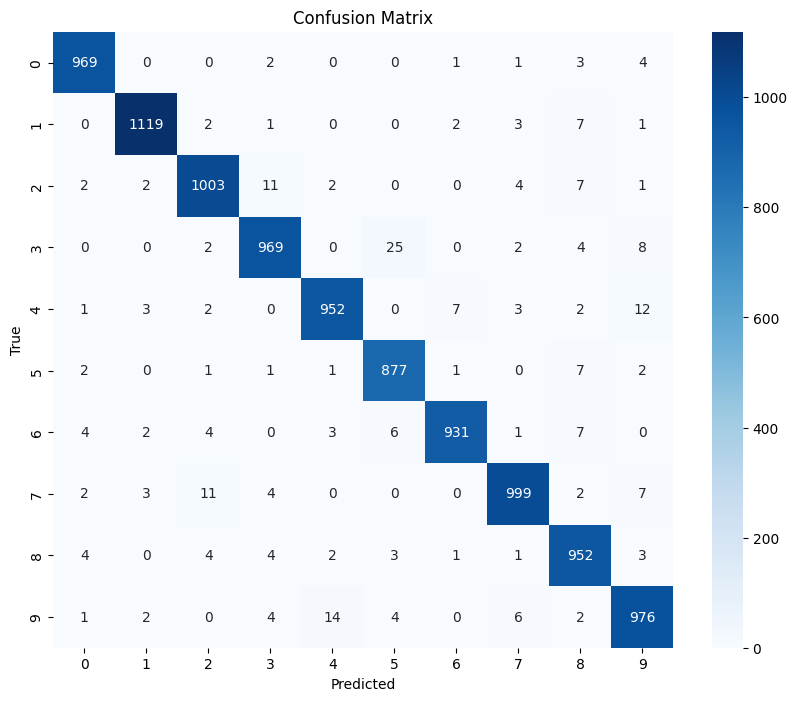


Normalized Confusion Matrix:


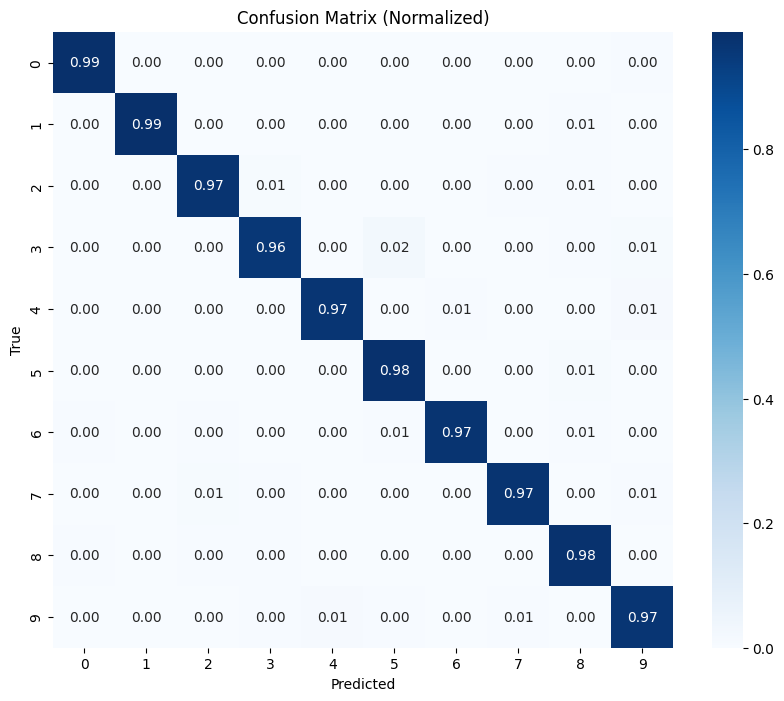

In [ ]:
def plot_confusion_matrix(labels, predictions, classes, normalize=False):
    """Plot confusion matrix with or without normalization."""
    cm = confusion_matrix(labels, predictions, normalize='true' if normalize else None)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues",
        xticklabels=classes, yticklabels=classes
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix (Normalized)" if normalize else "Confusion Matrix")
    plt.show()
classes = list(range(10))  # Class labels for MNIST
print("\nConfusion Matrix:")
plot_confusion_matrix(all_labels.numpy(), all_preds.numpy(), classes, normalize=False)
print("\nNormalized Confusion Matrix:")
plot_confusion_matrix(all_labels.numpy(), all_preds.numpy(), classes, normalize=True)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Prediction Distribution:


<ipython-input-102-69672c17cdce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions.numpy(), order=classes, palette="viridis")


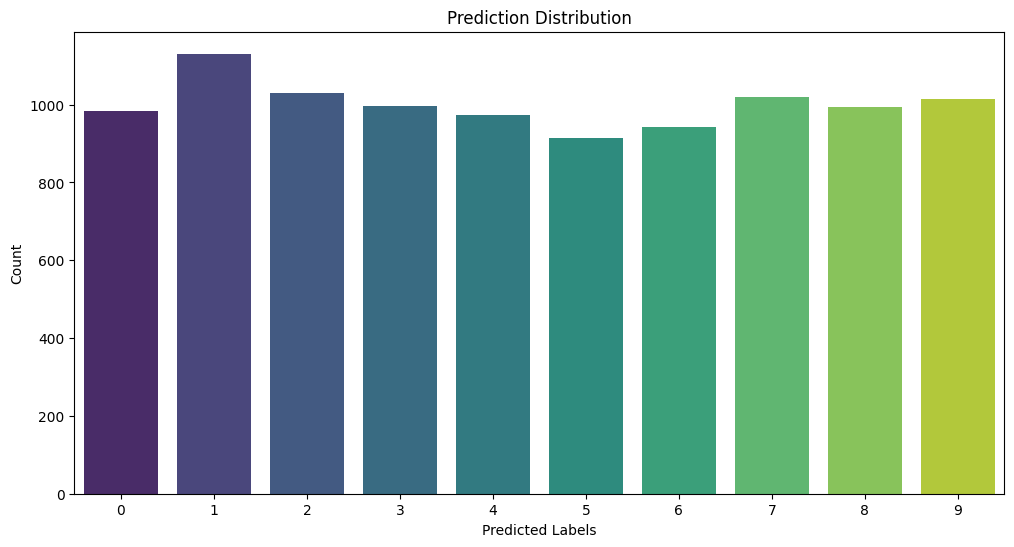

In [ ]:
print("Classification Report:")
print(classification_report(all_labels.numpy(), all_preds.numpy(), target_names=[str(c) for c in classes]))


def plot_prediction_distribution(predictions, classes):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=predictions.numpy(), order=classes, palette="viridis")
    plt.title("Prediction Distribution")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Count")
    plt.show()

print("\nPrediction Distribution:")
plot_prediction_distribution(all_preds, classes)


Misclassified Samples:


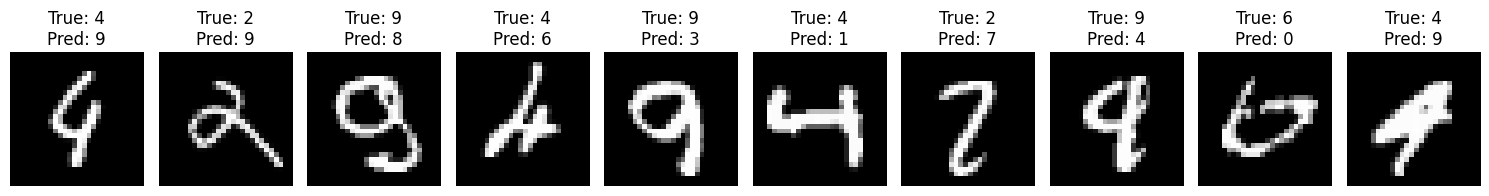

In [ ]:
def plot_misclassified_samples(images, labels, predictions, num_samples=10):
    """Plot examples of misclassified images."""
    misclassified_idxs = torch.nonzero(labels != predictions).squeeze()
    misclassified_idxs = misclassified_idxs[:num_samples]  # Limit to `num_samples`

    fig, axes = plt.subplots(1, len(misclassified_idxs), figsize=(15, 5))
    for i, idx in enumerate(misclassified_idxs):
        img = images[idx].reshape(28, 28).numpy()
        true_label = labels[idx].item()
        pred_label = predictions[idx].item()
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"True: {true_label}\nPred: {pred_label}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

print("\nMisclassified Samples:")
plot_misclassified_samples(all_images, all_labels, all_preds, num_samples=10)

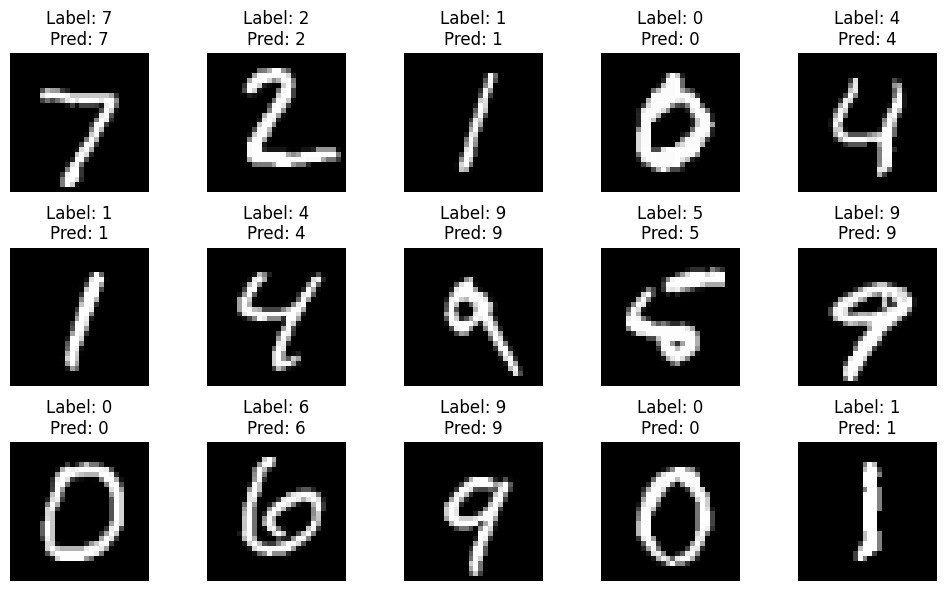

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()
for i in range(15):
    # Reshape the image to (28, 28) before displaying
    img = all_images[i].reshape(28, 28).numpy()  # Reshape to 2D
    label = all_labels[i].item()
    pred = all_preds[i].item()
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Label: {label}\nPred: {pred}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Step : 10 == Save the model.......

In [ ]:
torch.save(model.state_dict(), 'mnist_ann_model.pth')
print("\nModel saved as 'mnist_ann_model.pth'")


Model saved as 'mnist_ann_model.pth'
